In [1]:
import sys

sys.path.append("..")
# this is what you need for python script
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ParTIpy.arch import AA
from ParTIpy.generate_test_data import simulate
from ParTIpy.const import OPTIM_ALGS
from ParTIpy.paretoti_funcs import align_archetypes

In [2]:
N_SAMPLES = 30_000
N_ARCHETYPES = 8
N_DIMENSIONS = 20

X, A, Z = simulate(n_samples=N_SAMPLES, 
                   n_archetypes=N_ARCHETYPES, 
                   n_dimensions=N_DIMENSIONS, 
                   noise_std=0.0)

In [3]:
archetypes_results_list = []

for algo_str in ["projected_gradients", "frank_wolfe"]:
    AA_object = AA(n_archetypes=N_ARCHETYPES, 
                    weight=None,
                    optim=algo_str, 
                    init="random",
                    max_iter=100).fit(X)
    archetypes_results_list.append(
        (algo_str, AA_object.Z)
    )

## Calculated Archetypes

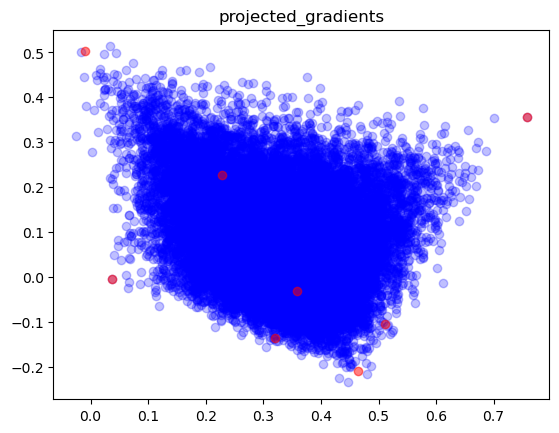

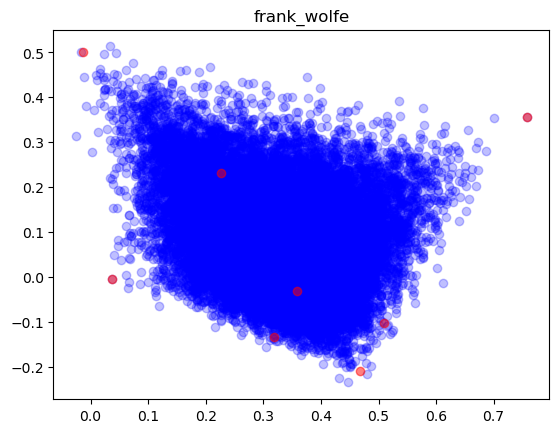

In [4]:
for algo in range(len(archetypes_results_list)):
    plt.scatter(X[:, 0], X[:, 1], c="blue", alpha=0.25)
    plt.scatter(archetypes_results_list[algo][1][:, 0], archetypes_results_list[algo][1][:, 1], c="red", alpha=0.5)
    plt.title(archetypes_results_list[algo][0])
    plt.show()

## Simulated Archetypes

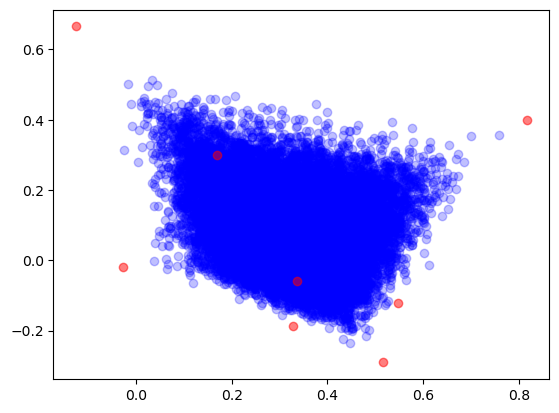

In [5]:
plt.scatter(X[:, 0], X[:, 1], c="blue", alpha=0.25)
plt.scatter(Z[:, 0], Z[:, 1], c="red", alpha=0.5)
plt.show()

In [6]:
for algo in range(len(archetypes_results_list)):
    Z_algo_ordered = align_archetypes(Z, archetypes_results_list[algo][1])
    print(f"MAE of {archetypes_results_list[algo][0]}: {np.mean(np.abs(Z_algo_ordered - Z))}")

MAE of projected_gradients: 0.09581969526015865
MAE of frank_wolfe: 0.09655356943193054


In [7]:
# plt.style.use("dark_background")
# sns.lineplot(data=plot_df, x="iteration", y="rss", hue="algorithm")
# plt.xlabel("Iteration")
# plt.ylabel("Residual Sum of Squares (RSS)")
# plt.show()

In [8]:
# df_list = []
# for optim_alg in OPTIM_ALGS:
#     AA_object = AA(n_archetypes=N_ARCHETYPES, 
#                    weight=None,
#                    optim=optim_alg, 
#                    init="random",
#                    max_iter=100).fit(X)
#     df_list.append(pd.DataFrame({
#         "rss": AA_object.RSS_trace.copy(),
#         "iteration": np.arange(len(AA_object.RSS_trace)),
#         "algorithm": optim_alg
#     }))
# plot_df = pd.concat(df_list, axis=0)
# plot_df